In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
iris_train=pd.read_csv('C:/Users/9/Downloads/train_iris.csv')

In [3]:
iris_train.head(10)

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
5,42,4.4,3.2,1.3,0.2,0
6,82,5.8,2.7,3.9,1.2,1
7,120,6.9,3.2,5.7,2.3,2
8,127,6.1,3.0,4.9,1.8,2
9,98,5.1,2.5,3.0,1.1,1


In [4]:
iris_train.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [5]:
X_train = iris_train.drop(['Unnamed: 0', 'species'], axis=1)

In [6]:
y_train = iris_train.species

In [7]:
X_train

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5
...,...,...,...,...
95,6.5,3.0,5.2,2.0
96,6.7,3.3,5.7,2.1
97,6.3,2.7,4.9,1.8
98,6.3,2.5,5.0,1.9


In [8]:
y_train

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

In [9]:
iris_test=pd.read_csv('C:/Users/9/Downloads/test_iris.csv')

In [10]:
iris_test.head(10)

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0
5,125,7.2,3.2,6.0,1.8,2
6,36,5.5,3.5,1.3,0.2,0
7,141,6.9,3.1,5.1,2.3,2
8,12,4.8,3.0,1.4,0.1,0
9,63,6.1,2.9,4.7,1.4,1


In [11]:
X_test = iris_test.drop(['Unnamed: 0', 'species'], axis=1)

In [12]:
y_test = iris_test.species

In [13]:
iris_test.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [14]:
max_depth_values = range(1, 100)

In [15]:
scores_data = pd.DataFrame()

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 1)

In [17]:
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.7, 0.7, 0.7, 0.7, 0.7])

In [18]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_sd = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_sd)

In [19]:
scores_data.head(10)

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.92,0.96
0,5,1.00,0.94,0.96
0,6,1.00,0.92,0.96
0,7,1.00,0.92,0.96
0,8,1.00,0.92,0.96
0,9,1.00,0.92,0.96
0,10,1.00,0.92,0.96


In [20]:
sdl = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
             var_name='set_type', value_name='score')

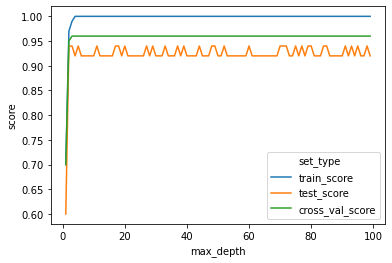

In [21]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=sdl)